# Results

Lets create randomly generated circuits and optimize them:

In [1]:
import sys
sys.path.append('../')
from optimizer import optimize
from random_circuit_generator import create_random_circuit
from functions import flat_probs_to_matrix

n_qubits_list = [3, 5, 7] # numbers of qubits in a circuit
n_templates_list = [10 * i for i in range(1, 8)] # numbers of templates added to a random circuit

# define probabilities for optimizer
initial_probs = [1 for i in range(6)] # equal probability for all templates when first template is picked
flat_transition_probs = [1 for i in range(30)] # equal probability for all other templates and zero for current one. same template is never applied twice in a row.
transition_probs = flat_probs_to_matrix(flat_transition_probs) # optimizer takes probabilities in matrix form
# next step could be to find best initial and transition probabilities.
 
# initialize lists
circuits = [[None] * len(n_templates_list) for i in range(len(n_qubits_list))]
optimized_circuits = [[None] * len(n_templates_list) for i in range(len(n_qubits_list))]
circuit_lengths = [[None] * len(n_templates_list) for i in range(len(n_qubits_list))]
opt_circuit_lengths = [[None] * len(n_templates_list) for i in range(len(n_qubits_list))]

# create random circuits and optimize them
for i, n_qubits in enumerate(n_qubits_list):
    for j, n_templates in enumerate(n_templates_list):
        circuit = create_random_circuit(n_qubits, n_templates)
        optimized_circuit = optimize(circuit=circuit, initial_probs=initial_probs, transition_probs=transition_probs)
        circuits[i][j] = circuit
        optimized_circuits[i][j] = optimized_circuit
        circuit_lengths[i][j] = len(circuit)
        opt_circuit_lengths[i][j] = len(optimized_circuit)


Let's plot the ratios optimized_circuit_length / circuit_length to see how well the optimizer works with different qubit counts and circuit lenghts.

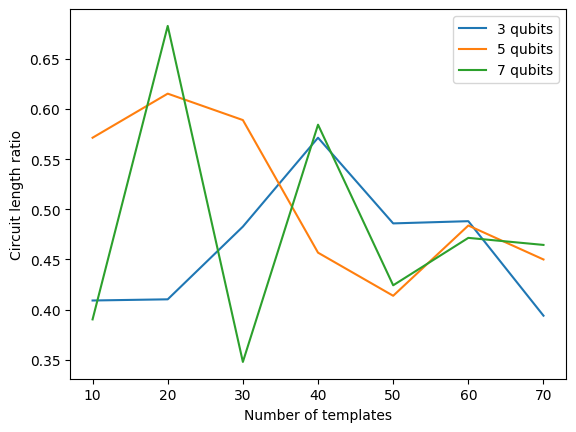

In [2]:
import matplotlib.pyplot as plt
import numpy as np

circuit_length_ratios = np.divide(np.array(opt_circuit_lengths), np.array(circuit_lengths))
for i in range(len(n_qubits_list)):
    label_string = str(n_qubits_list[i]) + " qubits"
    plt.plot(n_templates_list, circuit_length_ratios[i], label=label_string)

plt.xlabel('Number of templates')
plt.ylabel('Circuit length ratio')
plt.legend()
plt.show()


The ratios seem to oscillate quite a bit. Let's take the average of multiple cases for each qubit count and number of templates added to the random circuit.

In [4]:
n_circuits = 10 # amount of circuits created and optimized for each number of qubits and templates
average_circuit_length_ratios = [[None] * len(n_templates_list) for i in range(len(n_qubits_list))]

for i, n_qubits in enumerate(n_qubits_list):
    for j, n_templates in enumerate(n_templates_list):
        for k in range(n_circuits):
            circuit = create_random_circuit(n_qubits, n_templates)
            optimized_circuit = optimize(circuit=circuit, initial_probs=initial_probs, transition_probs=transition_probs)
            average_circuit_length_ratios[i][j] = len(optimized_circuit) / len(circuit)

In [5]:
print(average_circuit_length_ratios)

[[0.5263157894736842, 0.36363636363636365, 0.46551724137931033, 0.42168674698795183, 0.5882352941176471, 0.44642857142857145, 0.40939597315436244], [0.5217391304347826, 0.5348837209302325, 0.37681159420289856, 0.41836734693877553, 0.6504854368932039, 0.5193798449612403, 0.4701492537313433], [0.38461538461538464, 0.525, 0.5441176470588235, 0.5063291139240507, 0.5514018691588785, 0.6, 0.4603174603174603]]


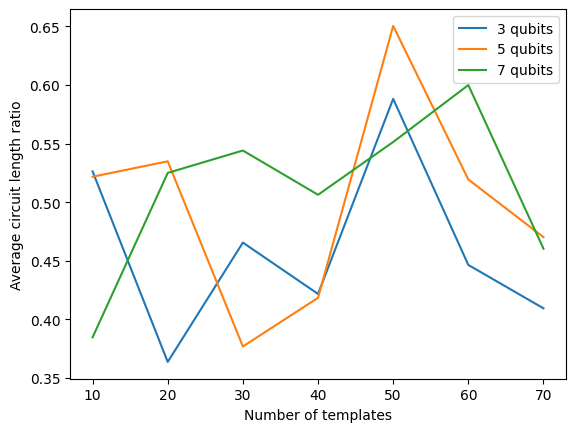

In [6]:
for i in range(len(n_qubits_list)):
    label_string = str(n_qubits_list[i]) + " qubits"
    plt.plot(n_templates_list, average_circuit_length_ratios[i], label=label_string)

plt.xlabel('Number of templates')
plt.ylabel('Average circuit length ratio')
plt.legend()
plt.show()

There still seems to be a lot of oscillation in the ratios. The important thing is that for each data point the ratio is less than 1 meaning that the optimizer makes the circuit shorter.

Let's next create a massive circuit and optimize it:

In [22]:
import cirq
big_circuit = create_random_circuit(100, 1000)

initial_probs = [1 for i in range(6)] # equal probability for all templates when first template is picked
flat_transition_probs = [1 for i in range(30)] # equal probability for all other templates and zero for current one. same template is never applied twice in a row.
transition_probs = flat_probs_to_matrix(flat_transition_probs) # optimizer takes probabilities in matrix form

optimized_big_circuit = optimize(circuit=big_circuit, initial_probs=initial_probs, transition_probs=transition_probs)

In [23]:
import sys
sys.path.append('../')
from functions import is_cnot_with_multiple_targets
original_circuit_cnot_count = 0
for moment in big_circuit:
    for operation in moment:
        if operation.gate == cirq.CNOT or is_cnot_with_multiple_targets(operation):
            original_circuit_cnot_count +=1

print(original_circuit_cnot_count)

17853


In [24]:
optimized_circuit_cnot_count = 0
for moment in optimized_big_circuit:
    for operation in moment:
        if operation.gate == cirq.CNOT or is_cnot_with_multiple_targets(operation):
            optimized_circuit_cnot_count +=1

print(optimized_circuit_cnot_count)

824


In [26]:
print(len(big_circuit))
print(len(optimized_big_circuit))

14598
1184
